# Chapter 3 Exercises

## Exercises
(code from the book ommitted, for all code see https://github.com/chrismarch/handson-ml2/blob/scratch/my_exercises/03_classification.ipynb)

### 1.
_Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters)._

In [69]:
# Exercise 1
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.predict([some_digit])

array([5], dtype=uint8)

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'weights': ["uniform", "distance"], 'n_neighbors': [2, 4, 6, 8]},
  ]


grid_search = GridSearchCV(knn_clf, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           #return_train_score=True, 
                           verbose=2)
grid_search.fit(X_train, y_train)
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .....................n_neighbors=2, weights=uniform; total time=  18.4s
[CV] END .....................n_neighbors=2, weights=uniform; total time=  18.5s
[CV] END .....................n_neighbors=2, weights=uniform; total time=  18.6s
[CV] END ....................n_neighbors=2, weights=distance; total time=  18.4s
[CV] END ....................n_neighbors=2, weights=distance; total time=  18.7s
[CV] END ....................n_neighbors=2, weights=distance; total time=  19.2s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  22.9s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  22.8s
[CV] END .....................n_neighbors=4, weights=uniform; total time=  23.2s
[CV] END ....................n_neighbors=4, weights=distance; total time=  22.8s
[CV] END ....................n_neighbors=4, weights=distance; total time=  24.2s
[CV] END ....................n_neighbors=4, weigh

TypeError: predict() takes 2 positional arguments but 3 were given

In [98]:
sorted(grid_search.cv_results_.keys())
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [75]:
y_test_knn_pred = grid_search.predict(X_test)
f1_score(y_test, y_test_knn_pred, average="macro")

0.971224084176584

### 2.
_Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion._

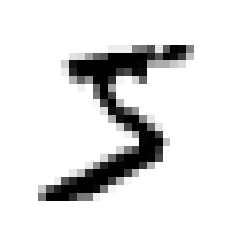

In [81]:
# Execise 2
def shift_digit(data, shift, axis):
    image = data.reshape(28, 28)
    image = np.roll(image, shift, axis)
    return image.flatten()

plot_digit(X[0])

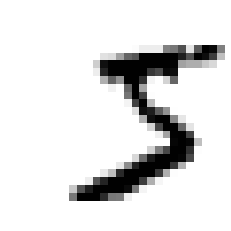

In [89]:
plot_digit(shift_digit(X[0], 4, 1))

In [111]:
X_train_l = np.array([shift_digit(xi, -1, 0) for xi in X_train])
X_train_r = np.array([shift_digit(xi, 1, 0) for xi in X_train])
X_train_d = np.array([shift_digit(xi, -1, 1) for xi in X_train])
X_train_u = np.array([shift_digit(xi, 1, 1) for xi in X_train])
X_train_aug = np.concatenate((X_train, X_train_l, X_train_r, X_train_d, X_train_u))
y_train_aug = np.concatenate((y_train, y_train, y_train, y_train, y_train))
print(X_train_aug.shape)
print(X_train.shape)
print(y_train_aug.shape)
print(y_train.shape)
knn_clf_aug = KNeighborsClassifier(n_neighbors=4, weights="distance")
knn_clf_aug.fit(X_train_aug, y_train_aug)
knn_clf_aug.predict([X_train_aug[0]])

(300000, 784)
(60000, 784)
(300000,)
(60000,)


array([5], dtype=uint8)

In [112]:
y_train_knn_pred = cross_val_predict(knn_clf_aug, X_train_aug, y_train_aug, cv=3)
f1_score(y_train_aug, y_train_knn_pred, average="macro")

0.9787896670568085

In [113]:
y_test_knn_aug_pred = knn_clf_aug.predict(X_test)
f1_score(y_test, y_test_knn_aug_pred, average="macro")

0.9762649231181537

(60000, 3920)

### 3.
_Tackle the Titanic dataset. A great place to start is on Kaggle._

See https://github.com/chrismarch/ml-exercises/tree/main/titanic

### 4.
_Build a spam classifier (a more challenging exercise):_

see https://github.com/chrismarch/ml-exercises/tree/main/spam-classifier